## **Fundamentals of Machine Learning: Final project**

This dataset contains simulated mushrooms for binary classification into edible and poisonous and it is available at the following link:

https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

## Dataset import and Data cleaning

Import libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [130]:
# Load CSV file into DataFrame
pd.set_option('display.max_columns', None)
mushrooms_train_df = pd.read_csv('../data/MushroomDataset/primary_data.csv', delimiter=';')
mushrooms_2_df = pd.read_csv('../data/secondary_data.csv', delimiter=';')

In [131]:
mushrooms_train_df.head(10)

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,[w],"[15, 20]","[15, 20]",[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,[w],"[6, 10]","[10, 20]",NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,[w],"[10, 12]","[10, 20]",NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,[w],"[7, 15]","[10, 25]",[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],[w],"[10, 12]","[10, 20]",NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"
5,Amanita Family,False Death Cap,e,"[4, 9]",[x],NaN,"[w, y]",[f],[e],NaN,[w],"[5, 7]","[10, 15]",[b],NaN,"[w, y]",[u],"[y, w]",[t],[g],NaN,[d],"[u, a]"
6,Amanita Family,Destroying Angel,p,"[5, 10]",[b],[t],[w],[f],[e],[c],[w],"[10, 15]","[10, 15]",NaN,[y],[w],[u],[w],[t],"[l, e]",NaN,[d],"[u, a]"
7,Amanita Family,Tawny Grisette,e,"[4, 8]","[c, x]","[h, t]",[n],[f],[e],NaN,[w],"[10, 15]","[10, 15]",NaN,[s],"[w, n]",[u],[w],[f],[f],NaN,[d],"[u, a]"
8,Lepiota Family,Parasol Mushroom,e,"[10, 25]","[p, f]",[y],"[w, n]",[f],NaN,NaN,[w],"[15, 35]","[15, 25]",[s],NaN,[n],NaN,NaN,[t],[m],NaN,"[m, d]","[u, a]"
9,Lepiota Family,Shaggy Parasol,e,"[12, 18]",[x],"[e, y]",[n],[t],[e],NaN,[w],"[8, 12]","[15, 20]",NaN,NaN,[w],NaN,NaN,[t],NaN,NaN,"[g, d]","[u, a]"


In [132]:
mushrooms_2_df.head(20)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,18.79,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,16.89,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,17.44,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,18.69,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,16.88,s,y,w,u,w,t,p,NaN,d,w


I can already see that there are a lot of NaN values in both datasets that I'm going to explore later

In [133]:
# first dataset dimensions
mushrooms_train_df.shape

(173, 23)

In [134]:
#second dataset dimensions
mushrooms_2_df.shape

(61069, 21)

we decide to work on the second dataset where we've more entries since in the first one there aren't enough

In [135]:
mushrooms_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

we have 3 numerical variables and others are categorical

In [136]:
mushrooms_2_df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

Replacing '-' with '_'

In [137]:
mushrooms_2_df.columns = mushrooms_2_df.columns.map(lambda x: x.replace('-', '_'))

In [138]:
#check columns' names
mushrooms_2_df.columns

Index(['class', 'cap_diameter', 'cap_shape', 'cap_surface', 'cap_color',
       'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color',
       'stem_height', 'stem_width', 'stem_root', 'stem_surface', 'stem_color',
       'veil_type', 'veil_color', 'has_ring', 'ring_type', 'spore_print_color',
       'habitat', 'season'],
      dtype='object')

In [139]:
print(sum(mushrooms_2_df.isna().sum()))
print(mushrooms_2_df.duplicated().sum())

307463
146


There are null values and also duplicates--> I can handle missing values in different ways and check duplicates to know if it's better to remove them

In [140]:
mushrooms_2_df.isnull().sum()

class                       0
cap_diameter                0
cap_shape                   0
cap_surface             14120
cap_color                   0
does_bruise_or_bleed        0
gill_attachment          9884
gill_spacing            25063
gill_color                  0
stem_height                 0
stem_width                  0
stem_root               51538
stem_surface            38124
stem_color                  0
veil_type               57892
veil_color              53656
has_ring                    0
ring_type                2471
spore_print_color       54715
habitat                     0
season                      0
dtype: int64

Numerical variables don't have any null value.

I can see better also in this way:

In [141]:
#check percentage of NA values in object variables with NA
print("Percentage of null values in columns of object type:")
print(f"\npercentage of cap_surface NA value: \t\t\t\t{(mushrooms_2_df['cap_surface'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of gill_attachment NA value: \t\t\t{(mushrooms_2_df['gill_attachment'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of gill_spacing NA value: \t\t\t\t{(mushrooms_2_df['gill_spacing'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of stem_root NA value: \t\t\t\t{(mushrooms_2_df['stem_root'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of stem_surface NA value: \t\t\t\t{(mushrooms_2_df['stem_surface'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of veil_type NA value: \t\t\t\t{(mushrooms_2_df['veil_type'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of veil_color NA value: \t\t\t\t{(mushrooms_2_df['veil_color'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of ring_type NA value: \t\t\t\t{(mushrooms_2_df['ring_type'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of spore_print_color NA value: \t\t\t{(mushrooms_2_df['spore_print_color'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")

Percentage of null values in columns of object type:

percentage of cap_surface NA value: 				23.12%

percentage of gill_attachment NA value: 			16.18%

percentage of gill_spacing NA value: 				41.04%

percentage of stem_root NA value: 				84.39%

percentage of stem_surface NA value: 				62.43%

percentage of veil_type NA value: 				94.80%

percentage of veil_color NA value: 				87.86%

percentage of ring_type NA value: 				4.05%

percentage of spore_print_color NA value: 			89.60%


check if the presence of one of the features is a storng indicator of poisonous or edible 

Based on these informations:<br>
- there are a lot of Nan values in the columns **stem_root**, **stem_surface**,**veil_type**, **veil_color**, **spore_orint_color** --> more than 50% of the values are null --> WE DROP THESE COLUMNS
- **replace** the null values related the the others objects variables with their **mode** that is the value that occurs the  most in the variable, so it doesn't change the distirbution a lot

In [142]:
mushrooms_2_df.drop(columns = ["stem_root","stem_surface", "veil_type", "veil_color", "spore_print_color"], axis=1, inplace = True)

In [143]:
cap_surface_mode = mushrooms_2_df['cap_surface'].mode()[0]
mushrooms_2_df['cap_surface'] = mushrooms_2_df['cap_surface'].fillna(cap_surface_mode)
gill_attachment_mode = mushrooms_2_df['gill_attachment'].mode()[0]
mushrooms_2_df['gill_attachment'] = mushrooms_2_df['gill_attachment'].fillna(gill_attachment_mode)
gill_spacing_mode = mushrooms_2_df['cap_surface'].mode()[0]
mushrooms_2_df['gill_spacing'] = mushrooms_2_df['gill_spacing'].fillna(gill_spacing_mode)
ring_type_mode = mushrooms_2_df['ring_type'].mode()[0]
mushrooms_2_df['ring_type'] = mushrooms_2_df['ring_type'].fillna(ring_type_mode)

In [144]:
mushrooms_2_df.shape

(61069, 16)

I see that the size of the dataframe has reduced after removing the five unwanted columns.<br>
Now I check again for NA values as I did before

In [145]:
# check null values
mushrooms_2_df.isnull().sum()

class                   0
cap_diameter            0
cap_shape               0
cap_surface             0
cap_color               0
does_bruise_or_bleed    0
gill_attachment         0
gill_spacing            0
gill_color              0
stem_height             0
stem_width              0
stem_color              0
has_ring                0
ring_type               0
habitat                 0
season                  0
dtype: int64

Now we want to explore the duplicates to understand what is better to do:

In [146]:
# Identify duplicates in each column 
for column in mushrooms_2_df.columns:
    duplicates = mushrooms_2_df[column].duplicated(keep=False)  # 'keep=False' marks all duplicates as True
    if duplicates.any():
        print(f"Column '{column}' has duplicates:")
        print(mushrooms_2_df.loc[duplicates, column].drop_duplicates())
    else:
        print(f"Column '{column}' has no duplicates.")

Column 'class' has duplicates:
0       p
1059    e
Name: class, dtype: object
Column 'cap_diameter' has duplicates:
0        15.26
1        16.60
2        14.07
3        14.17
4        14.64
         ...  
58702    23.52
58710    22.97
58717    21.43
58743    22.53
58756    22.92
Name: cap_diameter, Length: 2060, dtype: float64
Column 'cap_shape' has duplicates:
0        x
3        f
354      p
2118     b
2471     c
4236     s
55068    o
Name: cap_shape, dtype: object
Column 'cap_surface' has duplicates:
0        g
3        h
706      t
2824     y
3177     e
7060     s
7413     l
7766     d
12002    w
19768    i
27181    k
Name: cap_surface, dtype: object
Column 'cap_color' has duplicates:
0        o
3        e
353      n
706      g
1412     r
1765     w
1771     y
3531     p
4589     u
4590     b
4944     l
15885    k
Name: cap_color, dtype: object
Column 'does_bruise_or_bleed' has duplicates:
0       f
1059    t
Name: does_bruise_or_bleed, dtype: object
Column 'gill_attachment' has d

We don't remove duplicates since there are not duplicate rows but categorical values in the columns, for this reason there are duplicates. Deleting them we may delete some relevant information from the dataset

Now that all the null values are settled I can proceed with the understanding of the values in the dataset, finding correlations between them.

In [147]:
mushrooms_2_df.head(5)

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem_width,stem_color,has_ring,ring_type,habitat,season
0,p,15.26,x,g,o,f,e,t,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,t,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,t,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,t,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,t,w,16.53,17.20,w,t,p,d,w


# Outlier detection

Number of outliers: 2262


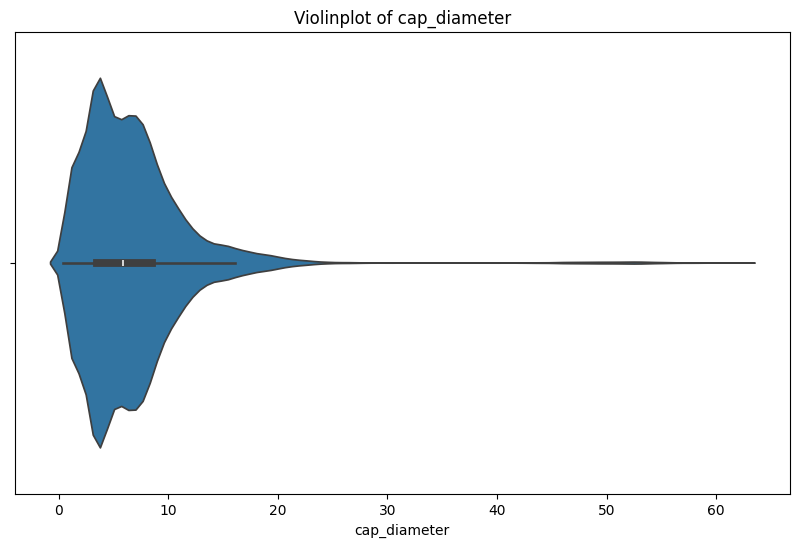

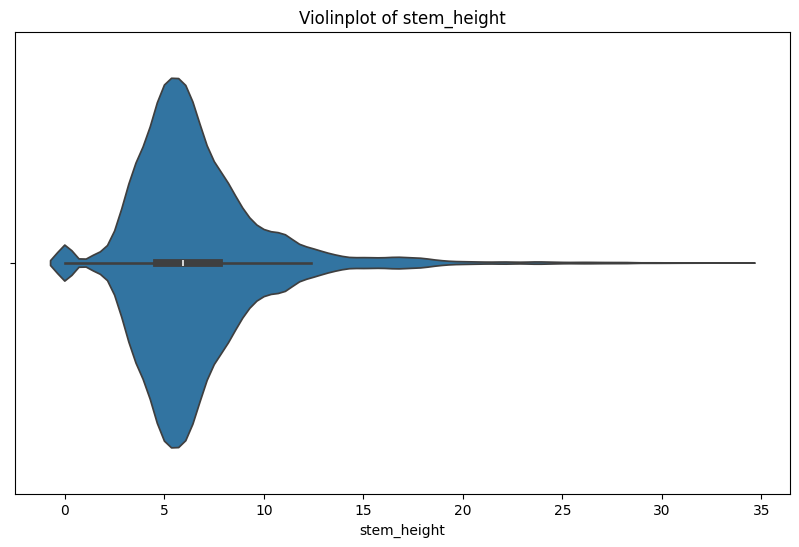

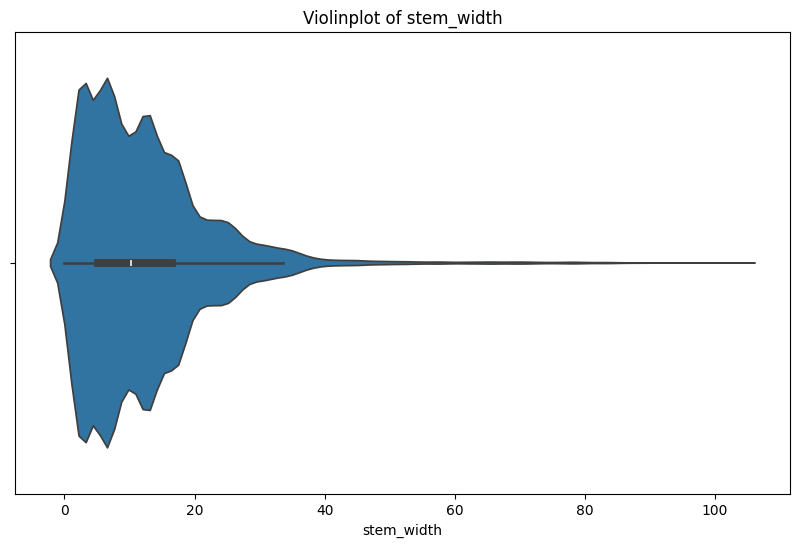

In [ ]:
z_scores = mushrooms_2_df[['cap_diameter', 'stem_height', 'stem_width']].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")


for col in ['cap_diameter', 'stem_height', 'stem_width']:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=mushrooms_2_df[col])
    plt.title(f"Violinplot of {col}")
    plt.show()



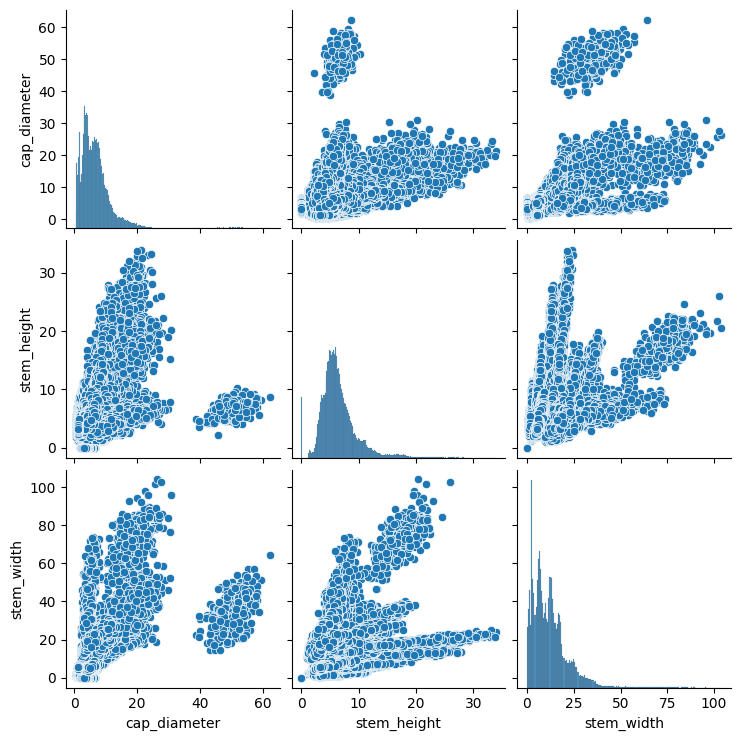

In [149]:
sns.pairplot(mushrooms_2_df[['cap_diameter', 'stem_height', 'stem_width']])
plt.show()


In [150]:
'''
# Filter only numerical columns
numerical_cols = mushrooms_2_df.select_dtypes(include=np.number).columns

# Apply percentile capping to numerical columns
for col in numerical_cols:
    lower_bound = mushrooms_2_df[col].quantile(0.05)
    upper_bound = mushrooms_2_df[col].quantile(0.95)
    mushrooms_2_df[col] = mushrooms_2_df[col].clip(lower=lower_bound, upper=upper_bound)

print("Percentile capping applied successfully to numerical columns.")
for col in ['cap_diameter', 'stem_height', 'stem_width']:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=mushrooms_2_df[col])
    plt.title(f"Violinplot of {col}")
    plt.show()
    '''

'\n# Filter only numerical columns\nnumerical_cols = mushrooms_2_df.select_dtypes(include=np.number).columns\n\n# Apply percentile capping to numerical columns\nfor col in numerical_cols:\n    lower_bound = mushrooms_2_df[col].quantile(0.05)\n    upper_bound = mushrooms_2_df[col].quantile(0.95)\n    mushrooms_2_df[col] = mushrooms_2_df[col].clip(lower=lower_bound, upper=upper_bound)\n\nprint("Percentile capping applied successfully to numerical columns.")\nfor col in [\'cap_diameter\', \'stem_height\', \'stem_width\']:\n    plt.figure(figsize=(10, 6))\n    sns.violinplot(x=mushrooms_2_df[col])\n    plt.title(f"Violinplot of {col}")\n    plt.show()\n    '

# Feature Engineering - Create the Mushroom Size and Stem Size Features

In [151]:
# creating a new feature 'mushroom_size' as the product of cap_diameter and stem_height
mushrooms_2_df['mushroom_size'] = mushrooms_2_df['cap_diameter'] * mushrooms_2_df['stem_height']
mushrooms_2_df['stem_size'] = mushrooms_2_df['stem_width'] * mushrooms_2_df['stem_height']

display(mushrooms_2_df.head(5))

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem_width,stem_color,has_ring,ring_type,habitat,season,mushroom_size,stem_size
0,p,15.26,x,g,o,f,e,t,w,16.95,17.09,w,t,g,d,w,258.6570,289.6755
1,p,16.60,x,g,o,f,e,t,w,17.99,18.19,w,t,g,d,u,298.6340,327.2381
2,p,14.07,x,g,o,f,e,t,w,17.80,17.74,w,t,g,d,w,250.4460,315.7720
3,p,14.17,f,h,e,f,e,t,w,15.77,15.98,w,t,p,d,w,223.4609,252.0046
4,p,14.64,x,h,o,f,e,t,w,16.53,17.20,w,t,p,d,w,241.9992,284.3160


## One-hot encoding categorical features

In [152]:
print(mushrooms_2_df.apply(lambda col: col.unique()))

class                                                              [p, e]
cap_diameter            [15.26, 16.6, 14.07, 14.17, 14.64, 15.34, 14.8...
cap_shape                                           [x, f, p, b, c, s, o]
cap_surface                             [g, h, t, y, e, s, l, d, w, i, k]
cap_color                            [o, e, n, g, r, w, y, p, u, b, l, k]
does_bruise_or_bleed                                               [f, t]
gill_attachment                                     [e, a, d, s, x, p, f]
gill_spacing                                                 [t, c, d, f]
gill_color                           [w, n, p, u, b, g, y, r, e, o, k, f]
stem_height             [16.95, 17.99, 17.8, 15.77, 16.53, 17.84, 17.7...
stem_width              [17.09, 18.19, 17.74, 15.98, 17.2, 18.79, 16.8...
stem_color                        [w, y, n, u, b, l, r, p, e, k, g, o, f]
has_ring                                                           [t, f]
ring_type                             

In [153]:
#choosing categorical features
categorical_features = [
    'cap_shape', 'cap_surface', 'cap_color', 'does_bruise_or_bleed',
    'gill_attachment', 'gill_spacing', 'gill_color', 'stem_color',
    'has_ring', 'ring_type', 'habitat', 'season'
]

In [154]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(mushrooms_2_df[categorical_features])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features))

# concatenate the one-hot encoded df with the original mushroom df
df_encoded = pd.concat([mushrooms_2_df, one_hot_df], axis=1)

# dropping the original columns with categorical features
df_encoded = df_encoded.drop(categorical_features, axis=1)
print(f"Encoded Mushroom dataset: \n{df_encoded}")

Encoded Mushroom dataset: 
      class  cap_diameter  stem_height  stem_width  mushroom_size  stem_size  \
0         p         15.26        16.95       17.09       258.6570   289.6755   
1         p         16.60        17.99       18.19       298.6340   327.2381   
2         p         14.07        17.80       17.74       250.4460   315.7720   
3         p         14.17        15.77       15.98       223.4609   252.0046   
4         p         14.64        16.53       17.20       241.9992   284.3160   
...     ...           ...          ...         ...            ...        ...   
61064     p          1.18         3.93        6.22         4.6374    24.4446   
61065     p          1.27         3.18        5.43         4.0386    17.2674   
61066     p          1.27         3.86        6.37         4.9022    24.5882   
61067     p          1.24         3.56        5.44         4.4144    19.3664   
61068     p          1.17         3.25        5.45         3.8025    17.7125   

       cap_s

# Train Test Validation split

## Standarising Numerical Features
Standardizing the numerical features by removing the mean and scaling to unit variance for each feature (z-score standardization)

In [155]:
from sklearn.preprocessing import StandardScaler, RobustScaler

numerical_features = ["cap_diameter", "stem_height","stem_width", 'mushroom_size', 'stem_size' ]
scaler = RobustScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])


print(df_encoded)

      class  cap_diameter  stem_height  stem_width  mushroom_size  stem_size  \
0         p      1.857708     3.548387    0.607394       4.656719   2.299246   
1         p      2.122530     3.883871    0.704225       5.482134   2.670803   
2         p      1.622530     3.822581    0.664613       4.487184   2.557384   
3         p      1.642292     3.167742    0.509683       3.930016   1.926618   
4         p      1.735178     3.412903    0.617077       4.312781   2.246232   
...     ...           ...          ...         ...            ...        ...   
61064     p     -0.924901    -0.651613   -0.349472      -0.588087  -0.324332   
61065     p     -0.907115    -0.893548   -0.419014      -0.600451  -0.395327   
61066     p     -0.907115    -0.674194   -0.336268      -0.582620  -0.322912   
61067     p     -0.913043    -0.770968   -0.418134      -0.592692  -0.374564   
61068     p     -0.926877    -0.870968   -0.417254      -0.605326  -0.390924   

       cap_shape_b  cap_shape_c  cap_sh

## Encoding the dependent variable

In [156]:
df_encoded['class'] = df_encoded['class'].map({'e': 0, 'p': 1})
df_encoded.head(5)

,class,cap_diameter,stem_height,stem_width,mushroom_size,stem_size,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_o,cap_shape_p,cap_shape_s,cap_shape_x,cap_surface_d,cap_surface_e,cap_surface_g,cap_surface_h,cap_surface_i,cap_surface_k,cap_surface_l,cap_surface_s,cap_surface_t,cap_surface_w,cap_surface_y,cap_color_b,cap_color_e,cap_color_g,cap_color_k,cap_color_l,cap_color_n,cap_color_o,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y,does_bruise_or_bleed_f,does_bruise_or_bleed_t,gill_attachment_a,gill_attachment_d,gill_attachment_e,gill_attachment_f,gill_attachment_p,gill_attachment_s,gill_attachment_x,gill_spacing_c,gill_spacing_d,gill_spacing_f,gill_spacing_t,gill_color_b,gill_color_e,gill_color_f,gill_color_g,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,gill_color_w,gill_color_y,stem_color_b,stem_color_e,stem_color_f,stem_color_g,stem_color_k,stem_color_l,stem_color_n,stem_color_o,stem_color_p,stem_color_r,stem_color_u,stem_color_w,stem_color_y,has_ring_f,has_ring_t,ring_type_e,ring_type_f,ring_type_g,ring_type_l,ring_type_m,ring_type_p,ring_type_r,ring_type_z,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,1,1.857708,3.548387,0.607394,4.656719,2.299246,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,2.122530,3.883871,0.704225,5.482134,2.670803,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1.622530,3.822581,0.664613,4.487184,2.557384,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1.642292,3.167742,0.509683,3.930016,1.926618,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1.735178,3.412903,0.617077,4.312781,2.246232,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [157]:
df_encoded.to_csv('../data/MushroomDataset/processed_secondary_data.csv', index=False)